In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
jtplot.style(context="notebook", theme="chesterish", ticks=True, grid=True, figsize=(8, 6))

In [2]:
nba_raw = pd.read_csv("../data/nba.csv")
nba_raw.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [3]:
nba_raw.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

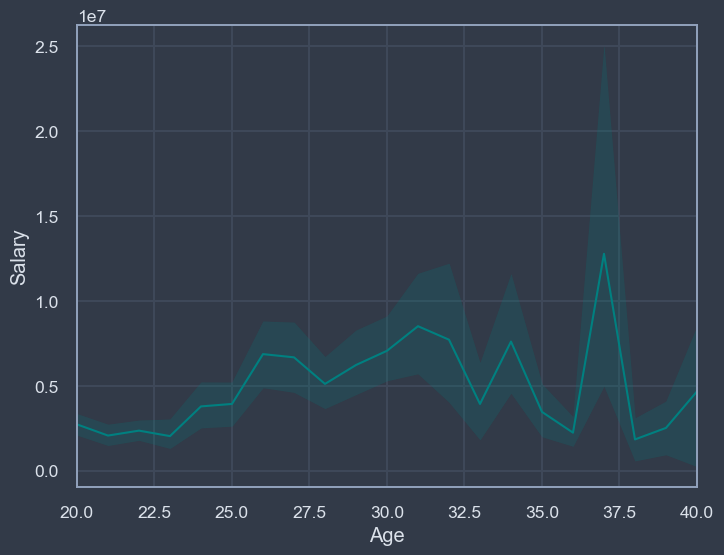

In [4]:
sns.lineplot(data=nba_raw, x="Age", y="Salary", color='teal')
plt.xlim((20, 40));

In [5]:
nba_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,457.0,1.767834e+01,1.596609e+01,0.0,5.00,13.0,25.0,99.0
Age,457.0,2.693873e+01,4.404016e+00,19.0,24.00,26.0,30.0,40.0
Weight,457.0,2.215230e+02,2.636834e+01,161.0,200.00,220.0,240.0,307.0
Salary,446.0,4.842684e+06,5.229238e+06,30888.0,1044792.25,2839073.0,6500000.0,25000000.0


In [6]:
nba_raw['Age'].min()

19.0

In [7]:
nba_raw[nba_raw['Age'] < 20]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
122,Devin Booker,Phoenix Suns,1.0,SG,19.0,6-6,206.0,Kentucky,2127840.0
226,Rashad Vaughn,Milwaukee Bucks,20.0,SG,19.0,6-6,202.0,UNLV,1733040.0


In [8]:
# -- median salary :: median is not affected by outliers like mean
median_salary = nba_raw.Salary.median()
mean_salary = nba_raw.Salary.mean()
print(median_salary, mean_salary, sep="\n")

2839073.0
4842684.105381166


In [9]:
nba_raw.Salary.max()

25000000.0

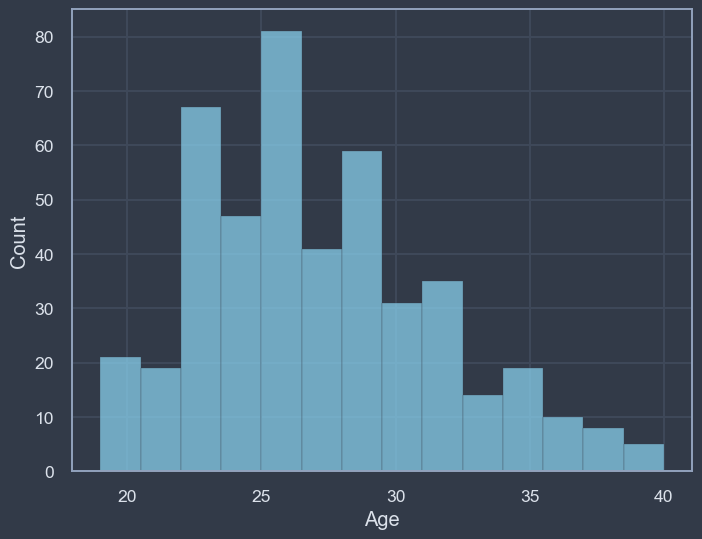

In [10]:
sns.histplot(data=nba_raw, x=nba_raw['Age'], color='skyblue');

In [11]:
nba_raw.shape

(458, 9)

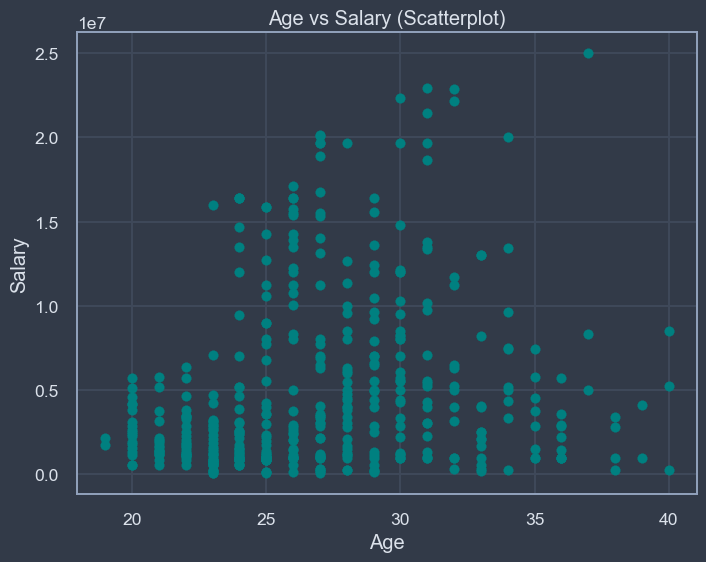

In [12]:
plt.scatter(nba_raw['Age'], nba_raw['Salary'], color='teal',)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary (Scatterplot)")
plt.show()

In [13]:
nba_raw.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [14]:
nba_raw['Salary'].replace(np.nan, nba_raw.Salary.median(), inplace=True)
nba_raw.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary       0
dtype: int64

## Data Concatination:

In [15]:
positions = nba_raw.pop("Position").values
positions_data = pd.DataFrame({'Position': positions})
positions_data

,Position
0,PG
1,SF
2,SG
3,SG
4,PF
...,...
453,PG
454,PG
455,C
456,C


In [16]:
pd.concat([nba_raw, positions_data], axis=1)

,Name,Team,Number,Age,Height,Weight,College,Salary,Position
0,Avery Bradley,Boston Celtics,0.0,25.0,6-2,180.0,Texas,7730337.0,PG
1,Jae Crowder,Boston Celtics,99.0,25.0,6-6,235.0,Marquette,6796117.0,SF
2,John Holland,Boston Celtics,30.0,27.0,6-5,205.0,Boston University,2839073.0,SG
3,R.J. Hunter,Boston Celtics,28.0,22.0,6-5,185.0,Georgia State,1148640.0,SG
4,Jonas Jerebko,Boston Celtics,8.0,29.0,6-10,231.0,NaN,5000000.0,PF
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,26.0,6-3,203.0,Butler,2433333.0,PG
454,Raul Neto,Utah Jazz,25.0,24.0,6-1,179.0,NaN,900000.0,PG
455,Tibor Pleiss,Utah Jazz,21.0,26.0,7-3,256.0,NaN,2900000.0,C
456,Jeff Withey,Utah Jazz,24.0,26.0,7-0,231.0,Kansas,947276.0,C


In [17]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

In [18]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

df5

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [19]:
df6

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [20]:
pd.concat([df5, df6])

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [21]:
# -- concates only common columns
pd.concat([df5, df6], join="inner")

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [22]:
df = pd.DataFrame({
        "A": ["A1", "A2"], 
        "B": ["B1", "B2"],
        "C": ["C1", "C2"]
})
df2 = pd.DataFrame({
        "B": ["B2", "B3"],
        "C": ["C3", "C4"]
})

In [23]:
pd.concat([df, df2])

,A,B,C
0,A1,B1,C1
1,A2,B2,C2
0,NaN,B2,C3
1,NaN,B3,C4


In [24]:
pd.concat([df, df2], join="inner", ignore_index=True)

,B,C
0,B1,C1
1,B2,C2
2,B2,C3
3,B3,C4


## Pandas Merge:

In [25]:
df1 = pd.DataFrame({
    'employee': ['Bob', 'Jake', 'Lisa', 'Sue'], 
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']
    })

df2 = pd.DataFrame({
    'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014]
    })

In [26]:
display(df1,  df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [27]:
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014
